In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def show_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

    plt.show()

In [32]:
df = pd.read_csv('Output/features.csv')
df

,file,stft_mean,stft_var,rms_mean,rms_var,cent_mean,cent_var,spec_bw_mean,spec_bw_var,rolloff_mean,...,mfcc_15_var,mfcc_16_mean,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,genre
0,blues.00091.wav,0.422259,0.092752,0.099364,0.001285,991.486589,4.159698e+05,1396.653097,262398.142890,1943.725473,...,46.714581,-3.756362,36.188797,-3.347305,45.800339,-2.416255,45.627956,-3.781820,40.245258,blues
1,blues.00071.wav,0.305165,0.080067,0.120498,0.000327,2429.004094,9.774405e+04,2286.767132,25016.954744,5065.090666,...,39.776932,-10.852217,36.393036,3.325135,41.159275,-6.184798,42.492859,3.009296,40.244335,blues
2,blues.00094.wav,0.376682,0.095909,0.140944,0.005366,1239.633448,5.268485e+05,1660.269704,232947.480887,2519.268190,...,80.583076,-6.227726,69.532059,0.598452,68.161964,-1.608321,68.203140,-0.539921,56.607864,blues
3,blues.00002.wav,0.363538,0.085257,0.175473,0.002751,1552.832481,1.564710e+05,1747.754087,76295.413398,3042.410115,...,40.641678,-7.724840,47.629646,-1.819024,52.393604,-3.440458,46.643398,-2.238128,30.653151,blues
4,blues.00025.wav,0.290948,0.091065,0.089166,0.003114,1109.320763,1.386901e+05,1463.110786,37662.210097,2243.316778,...,100.620071,-2.825916,87.332970,-2.682955,77.283379,0.741138,76.024796,-0.529237,67.647720,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,pop.00094.wav,0.332986,0.086064,0.198588,0.007012,2806.873513,8.091829e+05,2858.235592,278813.451439,6104.063554,...,36.064632,0.858990,82.510246,-1.245521,132.496140,2.527307,89.822670,0.780885,54.924786,pop
995,pop.00090.wav,0.353192,0.089734,0.194029,0.002238,3603.816900,9.363822e+05,3334.330761,110668.880739,7960.298939,...,53.076252,-2.660955,55.042362,4.285173,56.935120,1.353823,62.155743,-0.168289,41.335308,pop
996,pop.00024.wav,0.411107,0.097134,0.207414,0.008897,3301.092985,7.982225e+05,3175.464127,125804.761347,7301.571110,...,85.780106,-1.265129,92.020218,1.235827,93.999260,1.498413,102.688370,0.947467,96.332115,pop
997,pop.00036.wav,0.394622,0.089504,0.256515,0.007127,2944.414729,1.255014e+06,3162.449254,213961.543431,6878.242992,...,50.299046,0.380918,65.392647,-1.107457,76.976463,-0.425967,75.438065,1.564090,71.984047,pop


In [33]:
df.drop(columns=['file'], inplace=True)

In [34]:
labels = df.pop('genre')
labels

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
994      pop
995      pop
996      pop
997      pop
998      pop
Name: genre, Length: 999, dtype: object

In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
df_scaled

,stft_mean,stft_var,rms_mean,rms_var,cent_mean,cent_var,spec_bw_mean,spec_bw_var,rolloff_mean,rolloff_var,...,mfcc_15_mean,mfcc_15_var,mfcc_16_mean,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var
0,0.532062,0.827693,-0.479334,-0.486237,-1.691912,-0.134358,-1.607801,1.301565,-1.670092,0.304667,...,-0.878155,-0.414939,0.046069,-0.789754,-0.996847,-0.520487,-0.023146,-0.554228,-0.700176,-0.659718
1,-0.902153,-0.811632,-0.157361,-0.749921,0.316584,-0.928528,0.083616,-1.161878,0.312636,-1.131430,...,1.176144,-0.620316,-1.513604,-0.783652,0.727700,-0.655448,-1.026546,-0.638587,1.069688,-0.659739
2,-0.026178,1.235559,0.154147,0.637111,-1.345202,0.142353,-1.106870,0.995938,-1.304501,0.689033,...,0.007489,0.587679,-0.497138,0.206494,0.022966,0.129786,0.191971,0.053227,0.144710,-0.297895
3,-0.187180,-0.140956,0.680195,-0.082735,-0.907601,-0.781968,-0.940630,-0.629731,-0.972195,-0.743801,...,0.283494,-0.594717,-0.826205,-0.447918,-0.601850,-0.328756,-0.295847,-0.526904,-0.297867,-0.871827
4,-1.076292,0.609569,-0.634699,0.017311,-1.527274,-0.826342,-1.481517,-1.030651,-1.479788,-0.705804,...,-0.293403,1.180839,0.250582,0.738359,-0.825140,0.395035,0.817530,0.263693,0.147495,-0.053773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-0.561398,-0.036577,1.032353,1.090182,0.844542,0.846952,1.169535,1.471916,0.972604,1.582897,...,0.098171,-0.730212,1.060526,0.594263,-0.453624,2.000614,1.293109,0.634967,0.488932,-0.335113
995,-0.313904,0.437667,0.962893,-0.223795,1.958029,1.164393,2.074223,-0.273018,2.151706,-0.169671,...,-0.992953,-0.226613,0.286840,-0.226437,0.975830,-0.196689,0.980662,-0.109497,0.241563,-0.635614
996,0.395470,1.393924,1.166817,1.608964,1.535064,0.819599,1.772340,-0.115944,1.733274,0.350107,...,-0.233964,0.741528,0.593644,0.878407,0.187701,0.881131,1.019159,0.981158,0.532346,0.580519
997,0.193554,0.407942,1.914861,1.121792,1.036714,1.959576,1.747609,0.798910,1.464371,1.634343,...,0.142434,-0.308827,0.955446,0.082814,-0.417940,0.386110,0.506781,0.247905,0.693047,0.042115


In [36]:
le = LabelEncoder()
encoded_y = le.fit_transform(labels)
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,

In [37]:
one_hot = OneHotEncoder()

one_hot_y = one_hot.fit_transform(np.array(labels).reshape(-1, 1)).toarray()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, one_hot_y, test_size=0.2, random_state=42)

## modele z one-hot encoding

Random Forest
0.36


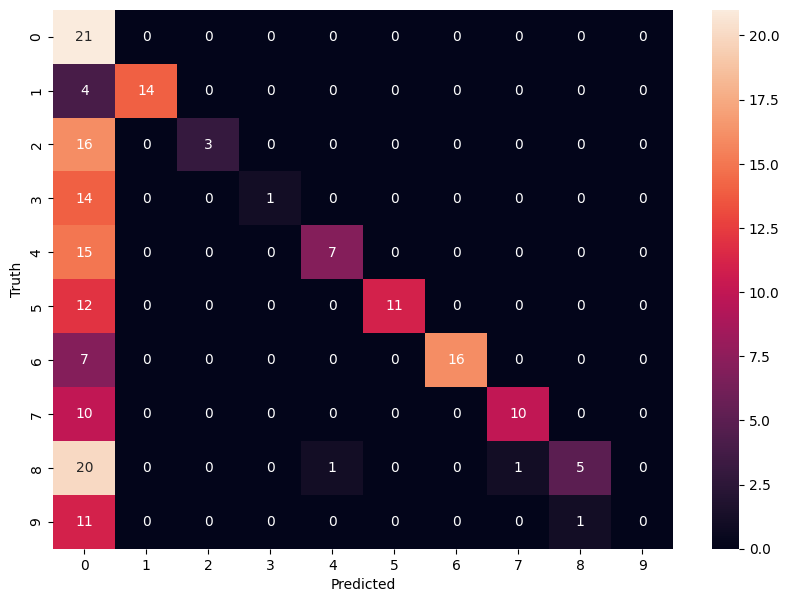

In [46]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest')
print(accuracy_score(y_test, y_pred))


show_cm(y_test.argmax(axis=1), y_pred.argmax(axis=1))

KNN
0.54


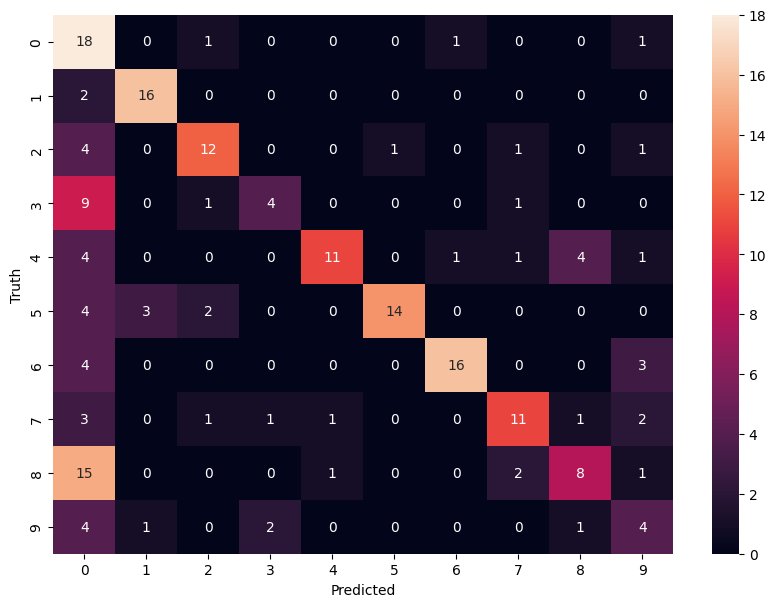

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('KNN')
print(accuracy_score(y_test, y_pred))

show_cm(y_test.argmax(axis=1), y_pred.argmax(axis=1))

## modele ze standardowym encodingiem

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, encoded_y, test_size=0.2, random_state=42, shuffle=True)

SVM
0.695


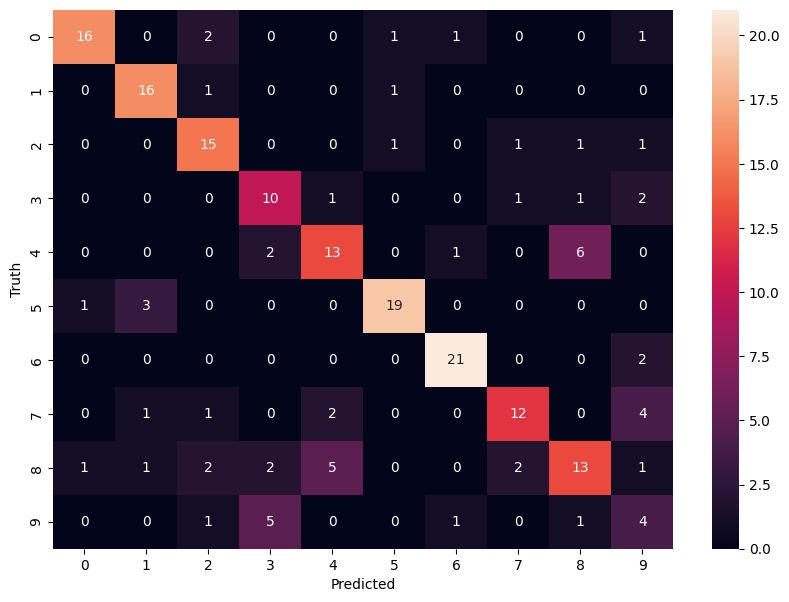

In [48]:
import xgboost as xgb
from sklearn.svm import SVC


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('SVM')
print(accuracy_score(y_test, y_pred))

show_cm(y_test, y_pred)

XGBoost
0.64


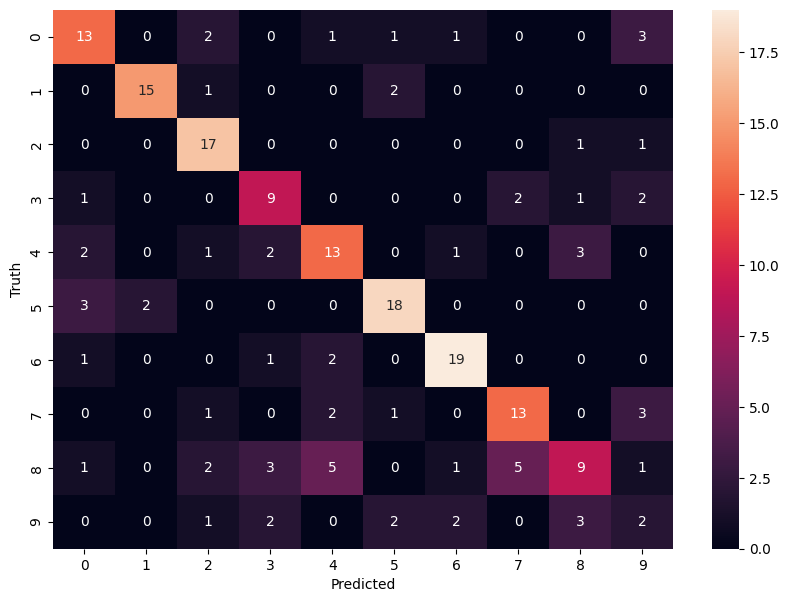

In [49]:
xgb_model = xgb.XGBClassifier(objective="multi:softmax", n_estimators=500)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('XGBoost')
print(accuracy_score(y_test, y_pred))

show_cm(y_test, y_pred)

Random Forest
0.7


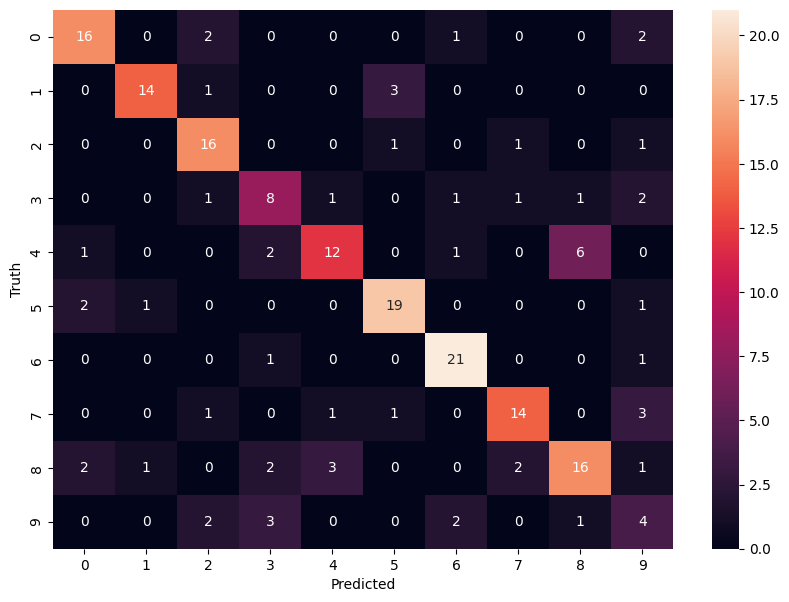

In [51]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest')
print(accuracy_score(y_test, y_pred))

show_cm(y_test, y_pred)